# Name - Sanjeev Kumar

## Timeline Analysis : Covid-19

## Objective:-
* Create a storyboard showing spread of Covid-19 cases in your country or any region

In [1]:
# import all the necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the datasets
data = pd.read_csv('covid-data.csv')
df = data.copy()

In [3]:
# first 5 columns
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
# last 5 columns
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60889,ZWE,Africa,Zimbabwe,2021-01-14,25368.0,1112.0,956.143,636.0,47.0,27.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60890,ZWE,Africa,Zimbabwe,2021-01-15,26109.0,741.0,921.286,666.0,30.0,28.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60891,ZWE,Africa,Zimbabwe,2021-01-16,26881.0,772.0,911.714,683.0,17.0,28.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60892,ZWE,Africa,Zimbabwe,2021-01-17,27203.0,322.0,818.000,713.0,30.0,29.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60893,ZWE,Africa,Zimbabwe,2021-01-18,27892.0,689.0,799.286,773.0,60.0,35.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [5]:
# dimension of the datasets
data.shape

(60894, 55)

* datasets has 60894 rows and 55 columns

In [6]:
# check dataset contains any null values
data.duplicated().sum()

0

#### This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60894 entries, 0 to 60893
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60547 non-null  object 
 1   continent                              60184 non-null  object 
 2   location                               60894 non-null  object 
 3   date                                   60894 non-null  object 
 4   total_cases                            60300 non-null  float64
 5   new_cases                              60293 non-null  float64
 6   new_cases_smoothed                     59338 non-null  float64
 7   total_deaths                           51827 non-null  float64
 8   new_deaths                             51826 non-null  float64
 9   new_deaths_smoothed                    59338 non-null  float64
 10  total_cases_per_million                59953 non-null  float64
 11  ne

#### Generate descriptive statistics.

In [8]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.030000e+04,60293.000000,59338.000000,5.182700e+04,51826.000000,59338.000000,59953.000000,59946.000000,58996.000000,51493.000000,...,57965.000000,39674.000000,58561.000000,59245.000000,46230.000000,45597.000000,29316.000000,53800.000000,60236.000000,58224.000000
mean,3.068993e+05,3142.516212,3131.088402,9.959993e+03,78.728437,67.588720,5298.683795,58.534848,58.319103,132.914798,...,19189.027582,13.165244,256.212781,7.767553,10.578320,32.637454,51.130482,3.042216,73.142412,0.715786
std,3.016209e+06,27991.831471,27593.276070,7.949920e+04,582.077246,523.975945,10771.310969,164.104590,135.831716,246.672007,...,19667.762419,19.878654,118.069479,3.889501,10.415009,13.451499,31.774305,2.471731,7.548919,0.153768
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.087500e+02,1.000000,4.429000,2.700000e+01,0.000000,0.000000,102.671000,0.066250,0.799000,4.627000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,5.153000e+03,42.000000,51.429000,1.590000e+02,1.000000,0.714000,792.999000,4.763000,6.438000,24.359000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.750000
75%,5.184725e+04,481.000000,515.429000,1.435500e+03,11.000000,8.429000,4973.513000,43.225500,48.065250,121.957000,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,9.555965e+07,862181.000000,738992.714000,2.040107e+06,17330.000000,13718.000000,117556.462000,8652.658000,2648.773000,1915.257000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


#### how many unique values each columns contains

In [9]:
data.nunique()

iso_code                                   191
continent                                    6
location                                   192
date                                       385
total_cases                              29824
new_cases                                 7202
new_cases_smoothed                       14906
total_deaths                             10324
new_deaths                                1455
new_deaths_smoothed                       3538
total_cases_per_million                  45445
new_cases_per_million                    25846
new_cases_smoothed_per_million           29162
total_deaths_per_million                 26330
new_deaths_per_million                    5199
new_deaths_smoothed_per_million           6325
reproduction_rate                          361
icu_patients                              1783
icu_patients_per_million                  3547
hosp_patients                             3286
hosp_patients_per_million                 5505
weekly_icu_ad

#### Percentage of missing values

In [10]:
missing_values_count = data.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

36.26149165315586


#### datasets has 36 percent of missing values

#### Clean  missing values

In [11]:
df = data.dropna(thresh=data.shape[0]*0.85,how='all',axis=1)
missing_values_count = df.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.088567523388688


#### Now datasets has 4 percent missing values

In [12]:
# columns name of the dataset
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [13]:
# Now let's check the first 5 rows of the dataset after cleaning
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.498


In [14]:
# top continent in terms of cases
data.continent.value_counts()

Africa           16680
Asia             15331
Europe           15300
North America     7330
South America     3884
Oceania           1659
Name: continent, dtype: int64

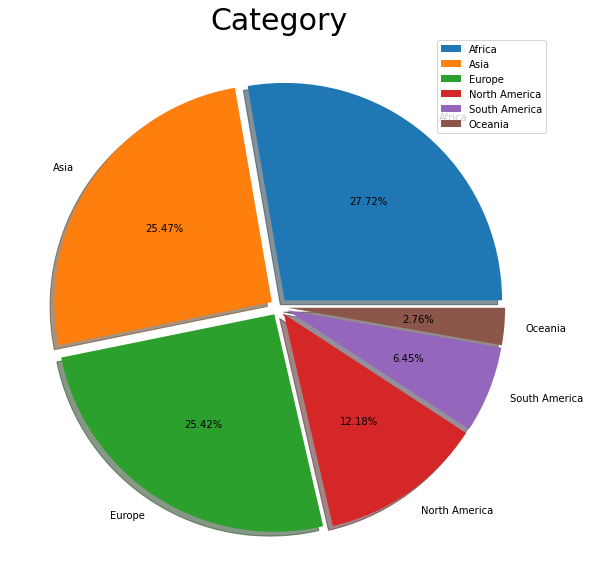

In [15]:
# plotting a pie chart
size = [16680,15331,15300,7330,3884,1659]
labels = "Africa", "Asia","Europe","North America","South America","Oceania"
explode = [0.04,0.04,0.04,0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('Category', fontsize = 30)
plt.legend()
plt.show()

## Analyzing cases worldwide  on this day 2021-01-15

In [16]:
dataset = data[data['date']=='2021-01-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
326,AFG,Asia,Afghanistan,2021-01-15,53831.0,56.0,71.286,2324.0,10.0,9.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
642,ALB,Europe,Albania,2021-01-15,66635.0,641.0,608.143,1265.0,4.0,5.000,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
971,DZA,Africa,Algeria,2021-01-15,103381.0,254.0,246.286,2827.0,5.0,4.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1294,AND,Europe,Andorra,2021-01-15,8946.0,78.0,65.286,88.0,0.0,0.571,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1599,AGO,Africa,Angola,2021-01-15,18679.0,66.0,87.571,428.0,3.0,1.857,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1911,ATG,North America,Antigua and Barbuda,2021-01-15,184.0,0.0,2.429,6.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2295,ARG,South America,Argentina,2021-01-15,1783047.0,12332.0,11385.000,45227.0,102.0,136.286,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
2619,ARM,Asia,Armenia,2021-01-15,163972.0,396.0,365.286,2974.0,11.0,9.429,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
2978,AUS,Oceania,Australia,2021-01-15,28689.0,20.0,15.286,909.0,0.0,0.000,...,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
3307,AUT,Europe,Austria,2021-01-15,390788.0,1528.0,1999.286,6987.0,66.0,49.429,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908


### Top 10 countries in terms of total_deaths

In [17]:
top_10_deaths = dataset.sort_values("total_deaths",ascending = False)
top_10_deaths.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57947,USA,North America,United States,2021-01-15,23556097.0,241576.0,232450.000,392499.0,3802.0,3319.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7764,BRA,South America,Brazil,2021-01-15,8393492.0,69198.0,54254.857,208246.0,1151.0,969.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24901,IND,Asia,India,2021-01-15,10542841.0,15158.0,18489.143,152093.0,175.0,217.571,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
35686,MEX,North America,Mexico,2021-01-15,1609735.0,21366.0,14543.429,139022.0,1106.0,993.286,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
57584,GBR,Europe,United Kingdom,2021-01-15,3325642.0,55885.0,51342.571,87448.0,1285.0,1069.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
27275,ITA,Europe,Italy,2021-01-15,2352423.0,16144.0,16361.857,81325.0,477.0,487.714,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
19683,FRA,Europe,France,2021-01-15,2931396.0,21673.0,18093.286,70090.0,638.0,360.571,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
45069,RUS,Europe,Russia,2021-01-15,3483531.0,24294.0,23195.429,63558.0,542.0,498.714,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
25906,IRN,Asia,Iran,2021-01-15,1318295.0,6485.0,6254.429,56621.0,83.0,86.143,...,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.798
51356,ESP,Europe,Spain,2021-01-15,2252164.0,40197.0,28829.143,53314.0,235.0,205.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


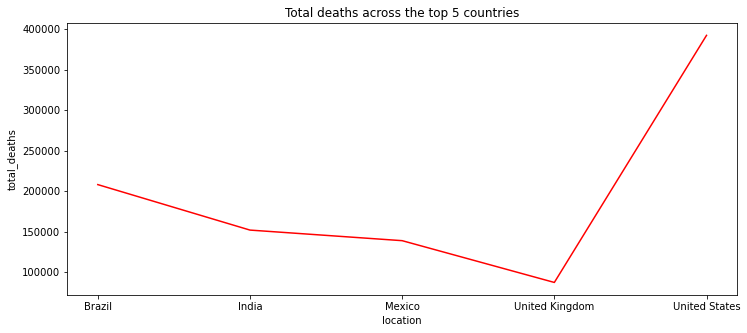

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_deaths[0:5],color='red')
plt.title("Total deaths across the top 5 countries")
plt.show()

### Top 10 countries in terms of total_deaths

In [19]:
top_10_new_cases  =  dataset.sort_values("new_cases",ascending = False)
top_10_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57947,USA,North America,United States,2021-01-15,23556097.0,241576.0,232450.000,392499.0,3802.0,3319.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7764,BRA,South America,Brazil,2021-01-15,8393492.0,69198.0,54254.857,208246.0,1151.0,969.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
57584,GBR,Europe,United Kingdom,2021-01-15,3325642.0,55885.0,51342.571,87448.0,1285.0,1069.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
51356,ESP,Europe,Spain,2021-01-15,2252164.0,40197.0,28829.143,53314.0,235.0,205.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
45069,RUS,Europe,Russia,2021-01-15,3483531.0,24294.0,23195.429,63558.0,542.0,498.714,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19683,FRA,Europe,France,2021-01-15,2931396.0,21673.0,18093.286,70090.0,638.0,360.571,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
35686,MEX,North America,Mexico,2021-01-15,1609735.0,21366.0,14543.429,139022.0,1106.0,993.286,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
11976,COL,South America,Colombia,2021-01-15,1870179.0,21078.0,16373.000,47868.0,377.0,348.143,...,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.747
27275,ITA,Europe,Italy,2021-01-15,2352423.0,16144.0,16361.857,81325.0,477.0,487.714,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
43058,PER,South America,Peru,2021-01-15,1056023.0,15792.0,4263.286,38654.0,255.0,86.429,...,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.750


#### this is the total cases in India till now 1272350637.0

### Top 10 countries with least cases 

In [20]:
top_10_least_total_cases  =  dataset.sort_values("total_cases",ascending = True)
top_10_least_total_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58639,VUT,Oceania,Vanuatu,2021-01-15,1.0,0.0,0.000,NaN,NaN,0.0,...,2921.909,13.2,546.300,12.02,2.8,34.5,25.209,NaN,70.47,0.603
46364,WSM,Oceania,Samoa,2021-01-15,2.0,0.0,0.000,NaN,NaN,0.0,...,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.713
34684,MHL,Oceania,Marshall Islands,2021-01-15,4.0,0.0,0.000,NaN,NaN,0.0,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.7,73.70,0.708
49694,SLB,Oceania,Solomon Islands,2021-01-15,17.0,0.0,0.000,NaN,NaN,0.0,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.546
58958,VAT,Europe,Vatican,2021-01-15,27.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
45680,KNA,North America,Saint Kitts and Nevis,2021-01-15,34.0,0.0,0.000,NaN,NaN,0.0,...,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.3,76.23,0.778
30154,LAO,Asia,Laos,2021-01-15,41.0,0.0,0.000,NaN,NaN,0.0,...,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.5,67.92,0.601
54980,TLS,Asia,Timor,2021-01-15,51.0,0.0,0.286,NaN,NaN,0.0,...,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.625
18966,FJI,Oceania,Fiji,2021-01-15,53.0,0.0,0.000,2.0,0.0,0.0,...,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.3,67.44,0.741
15751,DMA,North America,Dominica,2021-01-15,109.0,0.0,0.429,NaN,NaN,0.0,...,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.8,75.00,0.715


### Let's filter out Asia data

In [21]:
asia = data[data['continent'] =='Asia']
asia = asia[asia['date'] =='2021-01-15']
asia = asia[~asia['location'].isin(['World','International'])]
asia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
326,AFG,Asia,Afghanistan,2021-01-15,53831.0,56.0,71.286,2324.0,10.0,9.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2619,ARM,Asia,Armenia,2021-01-15,163972.0,396.0,365.286,2974.0,11.0,9.429,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.755
3632,AZE,Asia,Azerbaijan,2021-01-15,226549.0,349.0,447.429,2983.0,12.0,16.286,...,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.757
4271,BHR,Asia,Bahrain,2021-01-15,97020.0,208.0,284.286,357.0,1.0,0.429,...,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.846
4593,BGD,Asia,Bangladesh,2021-01-15,526485.0,762.0,827.857,7862.0,13.0,18.286,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608


### Asia Deaths

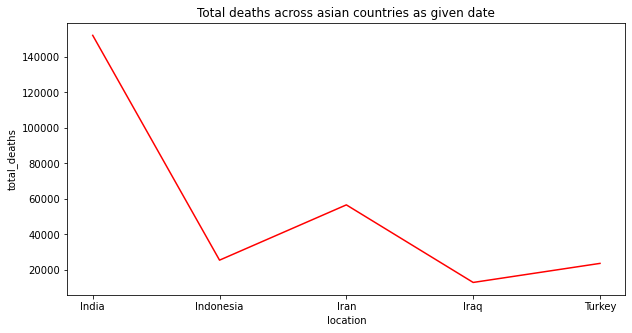

In [22]:
top_asia_deaths  = asia.sort_values("total_deaths", ascending = False)
top_asia_deaths.head()
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_asia_deaths[0:5],color='red')
plt.title("Total deaths across asian countries as given date")
plt.show()

## Top 10 Asian countries with least number of  total_cases being reported as given date

In [23]:
least_asia_cases = asia.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30154,LAO,Asia,Laos,2021-01-15,41.0,0.0,0.000,NaN,NaN,0.0,...,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.5,67.92,0.601
59631,VNM,Asia,Vietnam,2021-01-15,1536.0,5.0,3.429,35.0,0.0,0.0,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.6,75.40,0.694
9364,KHM,Asia,Cambodia,2021-01-15,436.0,10.0,7.000,NaN,NaN,0.0,...,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.8,69.82,0.582
53723,TWN,Asia,Taiwan,2021-01-15,843.0,1.0,2.571,7.0,0.0,0.0,...,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN
54980,TLS,Asia,Timor,2021-01-15,51.0,0.0,0.286,NaN,NaN,0.0,...,6570.102,30.3,335.346,6.86,6.3,78.1,28.178,5.9,69.50,0.625


### Least number of toal_cases reported across Asian Countries

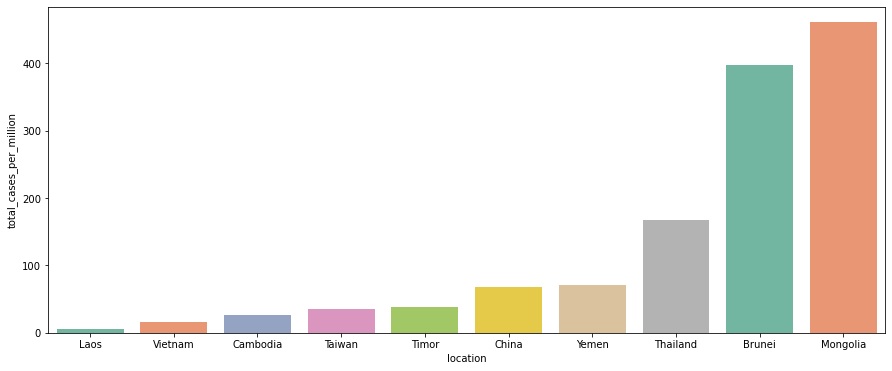

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x="location", y="total_cases_per_million", data=least_asia_cases.head(10),palette='Set2')
plt.show()

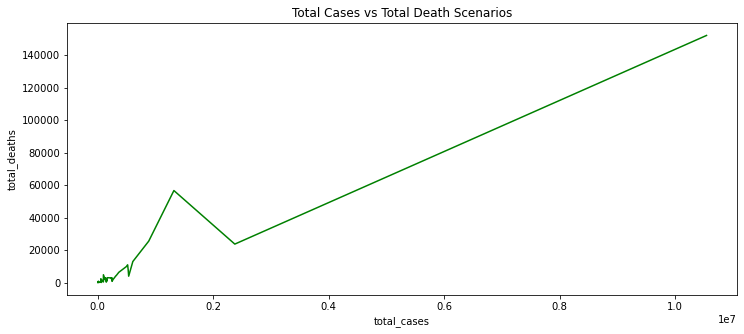

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia,color="green")
plt.title("Total Cases vs Total Death Scenarios")
plt.show()

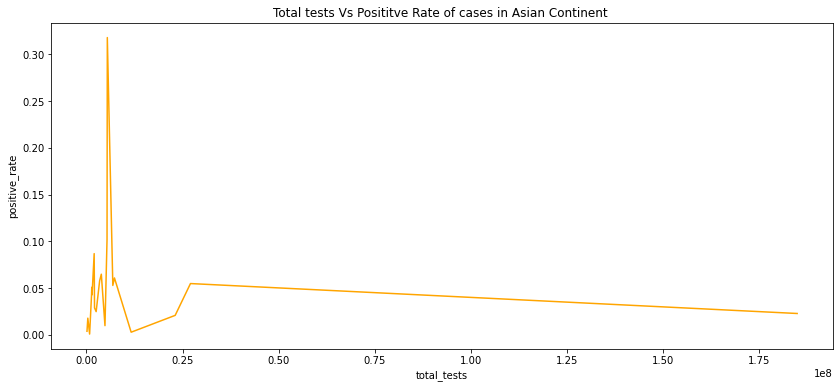

In [29]:
plt.figure(figsize=(14,6))
sns.lineplot(x='total_tests',y='positive_rate',data=asia,color="orange")
plt.title("Total tests Vs Posititve Rate of cases in Asian Continent ")
plt.show()

### covid cases in india

In [30]:
india=data[data["location"]=="India"]
india['total_cases'].sum()

1272350637.0

### Data Visualization

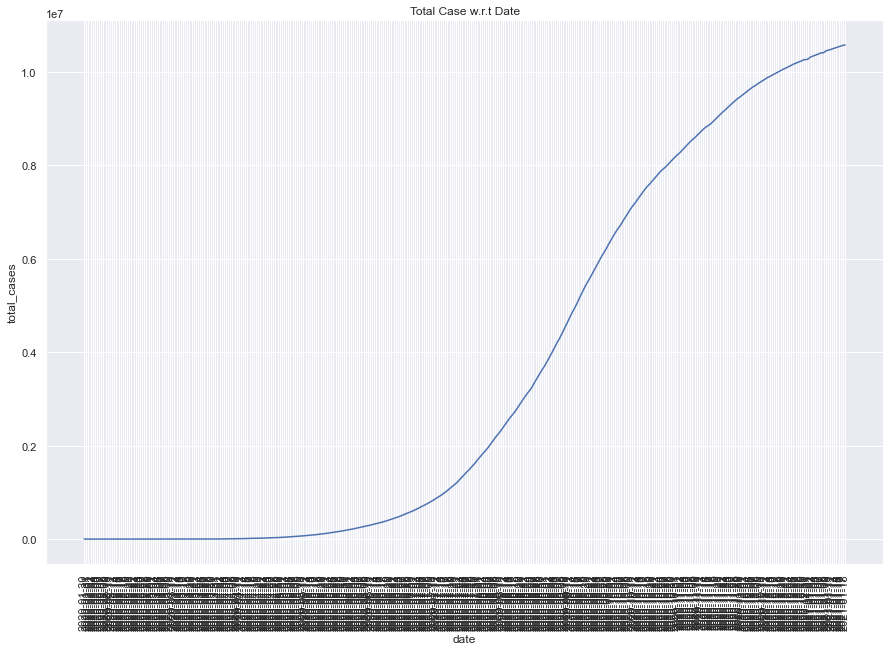

In [31]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.title('Total Case w.r.t Date')
plt.xticks(rotation=90)
plt.show()

### total cases last 5 days

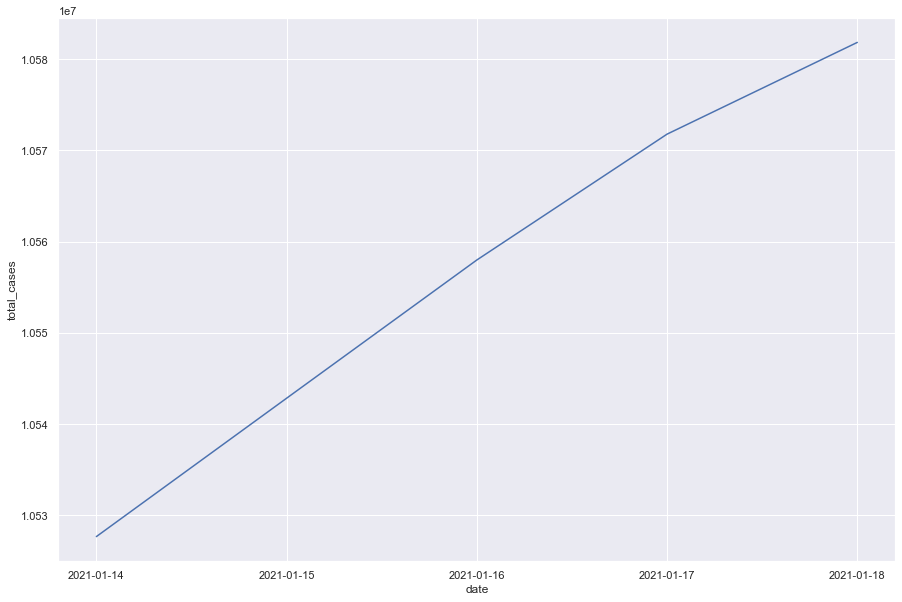

In [32]:
india_last_5_days=india.tail()
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

### total test per day

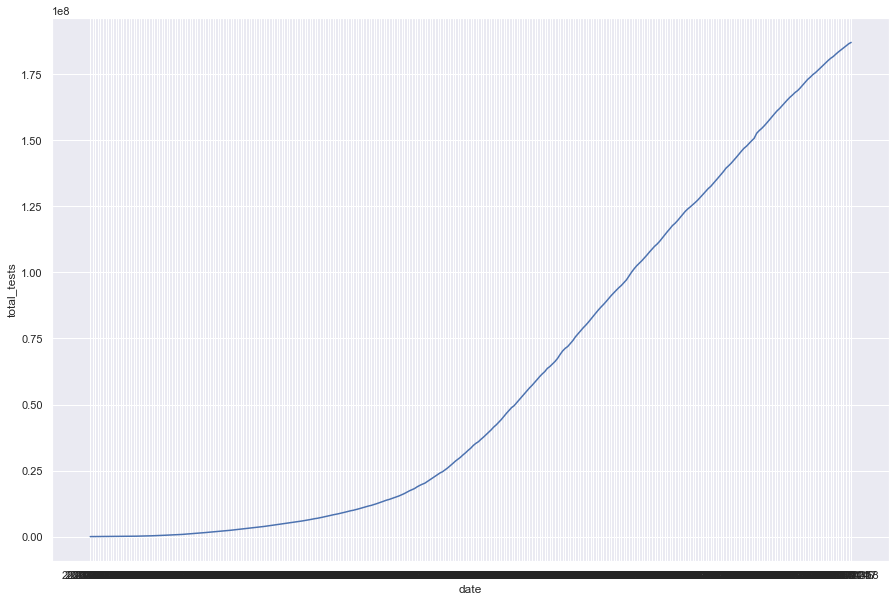

In [33]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

### total test last 5 days

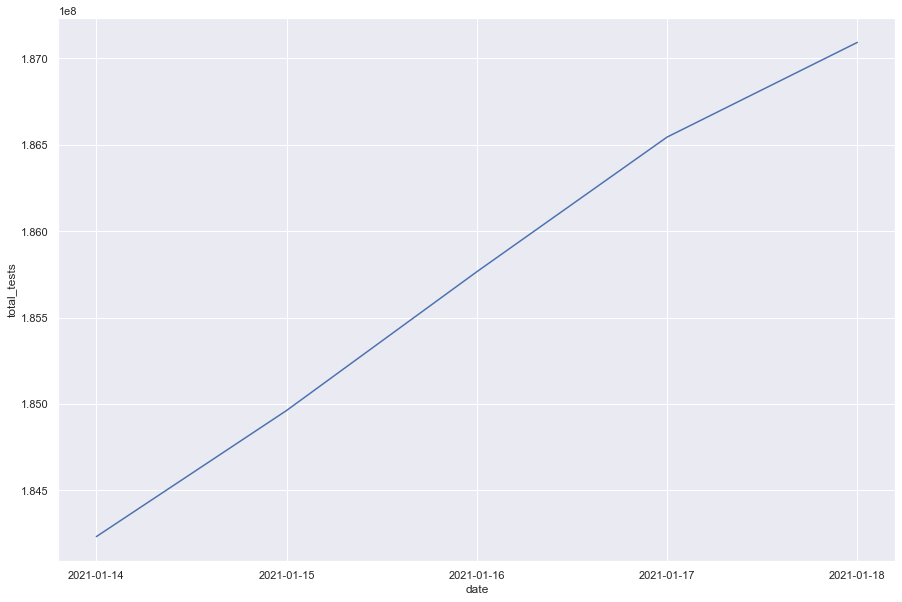

In [34]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

### Top 5 countries with maximum case

In [35]:
# getting latset data
last_day_cases = data[(data["date"]=="2021-01-15")]
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57947,USA,North America,United States,2021-01-15,23556097.0,241576.0,232450.000,392499.0,3802.0,3319.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24901,IND,Asia,India,2021-01-15,10542841.0,15158.0,18489.143,152093.0,175.0,217.571,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7764,BRA,South America,Brazil,2021-01-15,8393492.0,69198.0,54254.857,208246.0,1151.0,969.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
45069,RUS,Europe,Russia,2021-01-15,3483531.0,24294.0,23195.429,63558.0,542.0,498.714,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
57584,GBR,Europe,United Kingdom,2021-01-15,3325642.0,55885.0,51342.571,87448.0,1285.0,1069.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


### Countires wise cases

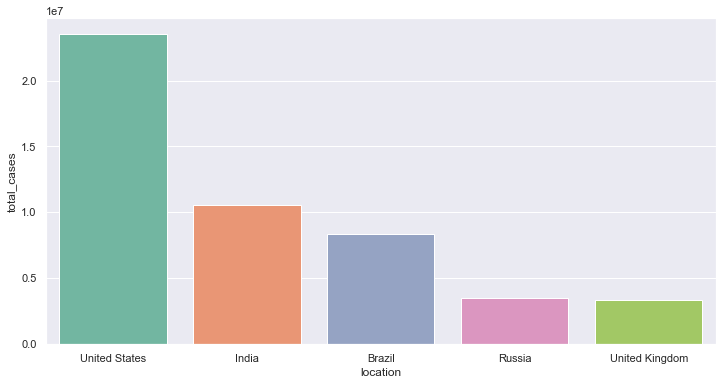

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],palette='Set2')
plt.show()